In [1]:
import sys 
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing Machine learning Lbrary
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.impute import SimpleImputer  # dealing with NaN
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn import svm, datasets # for Support Vector Machine
from sklearn.svm import SVC

In [3]:
## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
# Data Wrangling
df.shape


(569, 33)

In [8]:
df[df == '?'] = np.NaN
# Drop missing values and print shape of new DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
y = df.diagnosis     # target= M or B 

list = ['Unnamed: 32','id','diagnosis']
features = df.drop(list,axis = 1,inplace = False)

list = ['Unnamed: 32','id']
df.drop(list, axis = 1, inplace = True)

In [10]:
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Exploratory Data Analysis

<AxesSubplot:>

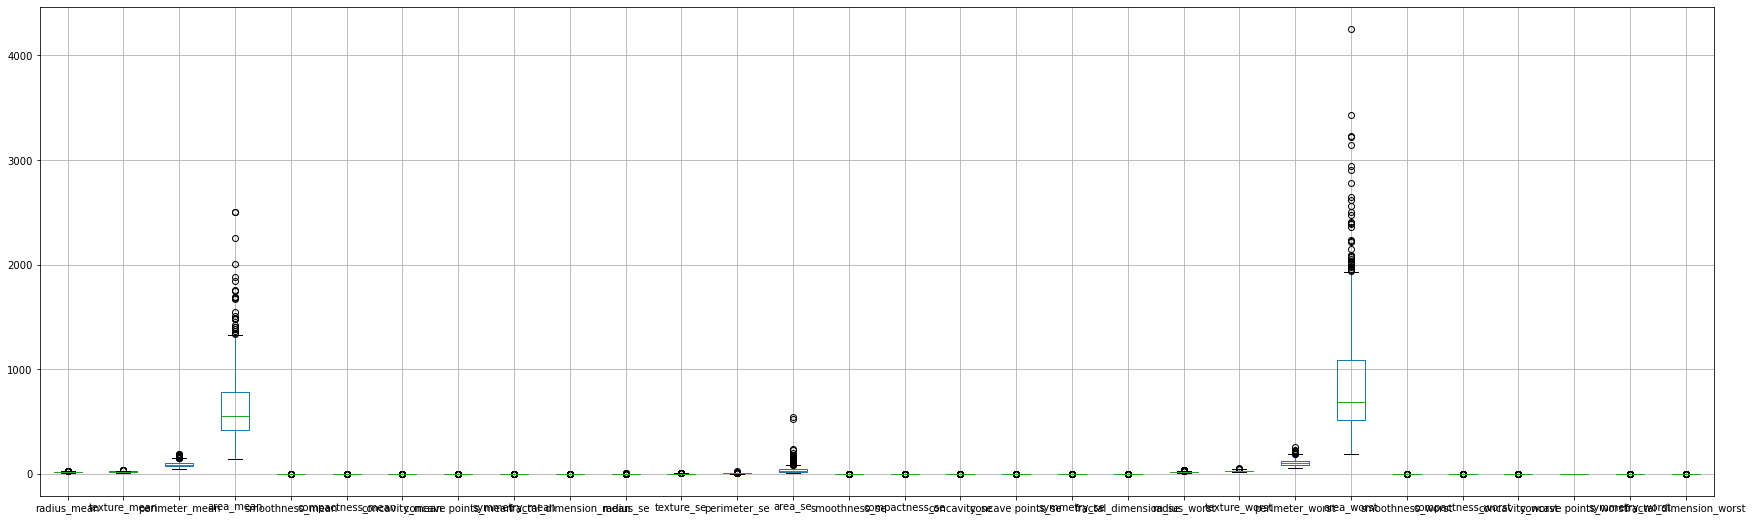

In [11]:
df.boxplot(figsize=(30,9))

Number of Malignant :  212
Number of Benign:  357


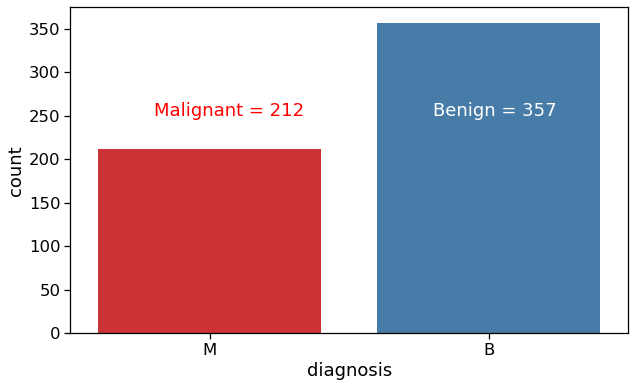

In [12]:
# The frequency of cancer stages
B, M = df['diagnosis'].value_counts()
print('Number of Malignant : ', M)
print('Number of Benign: ', B)

plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot('diagnosis',data=df, palette="Set1")
plt.annotate('Malignant = 212', xy=(-0.2, 250), xytext=(-0.2, 250), size=18, color='red')
plt.annotate('Benign = 357', xy=(0.8, 250), xytext=(0.8, 250), size=18, color='w');

In [13]:
features.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [14]:
df.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
# Standardization of features
# Data are distributed in a wide range, therefore, features were standardized 
# before their visualization, so they have a mean of ‘0’ and a standard deviation of ‘1’.

stdX = (features - features.mean()) / (features.std())              
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')


# Boxplot of features by diagnosis


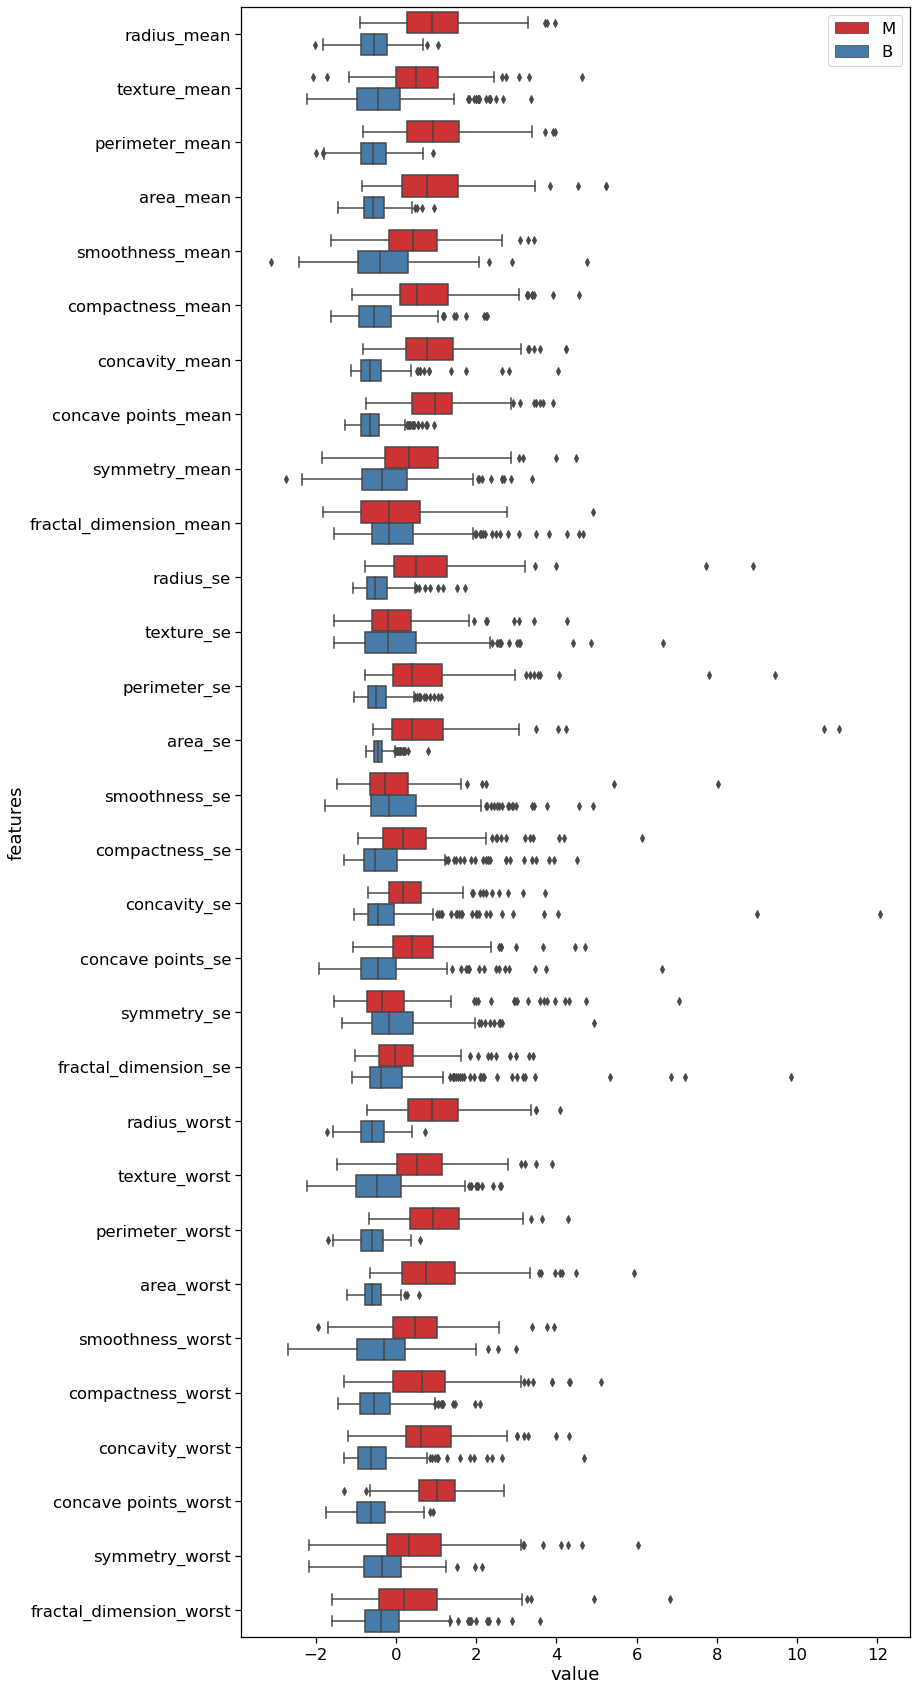

In [16]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="diagnosis", data=data_st, palette='Set1')
plt.legend(loc='best');

# Violin plot of features by diagnosis


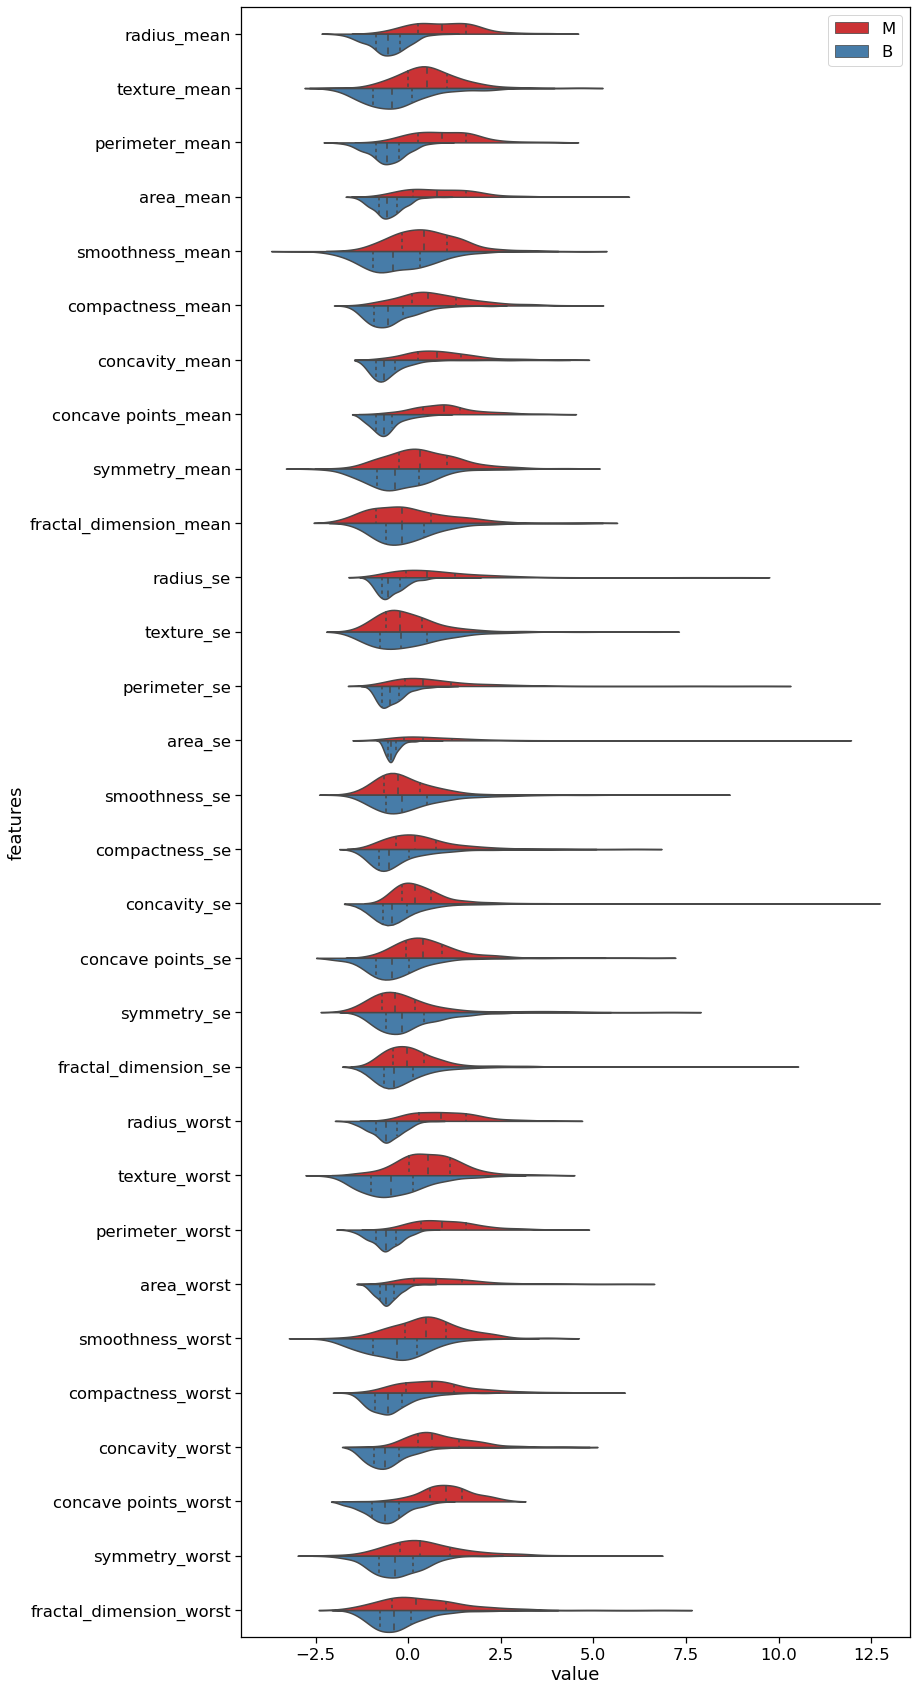

In [17]:
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.violinplot(x="value", y="features", hue="diagnosis", data=data_st,split=True, 
               inner="quart", palette='Set1')
plt.legend(loc='best');

# Correlation
#### Looking at correlations matrix, defined via Pearson function.



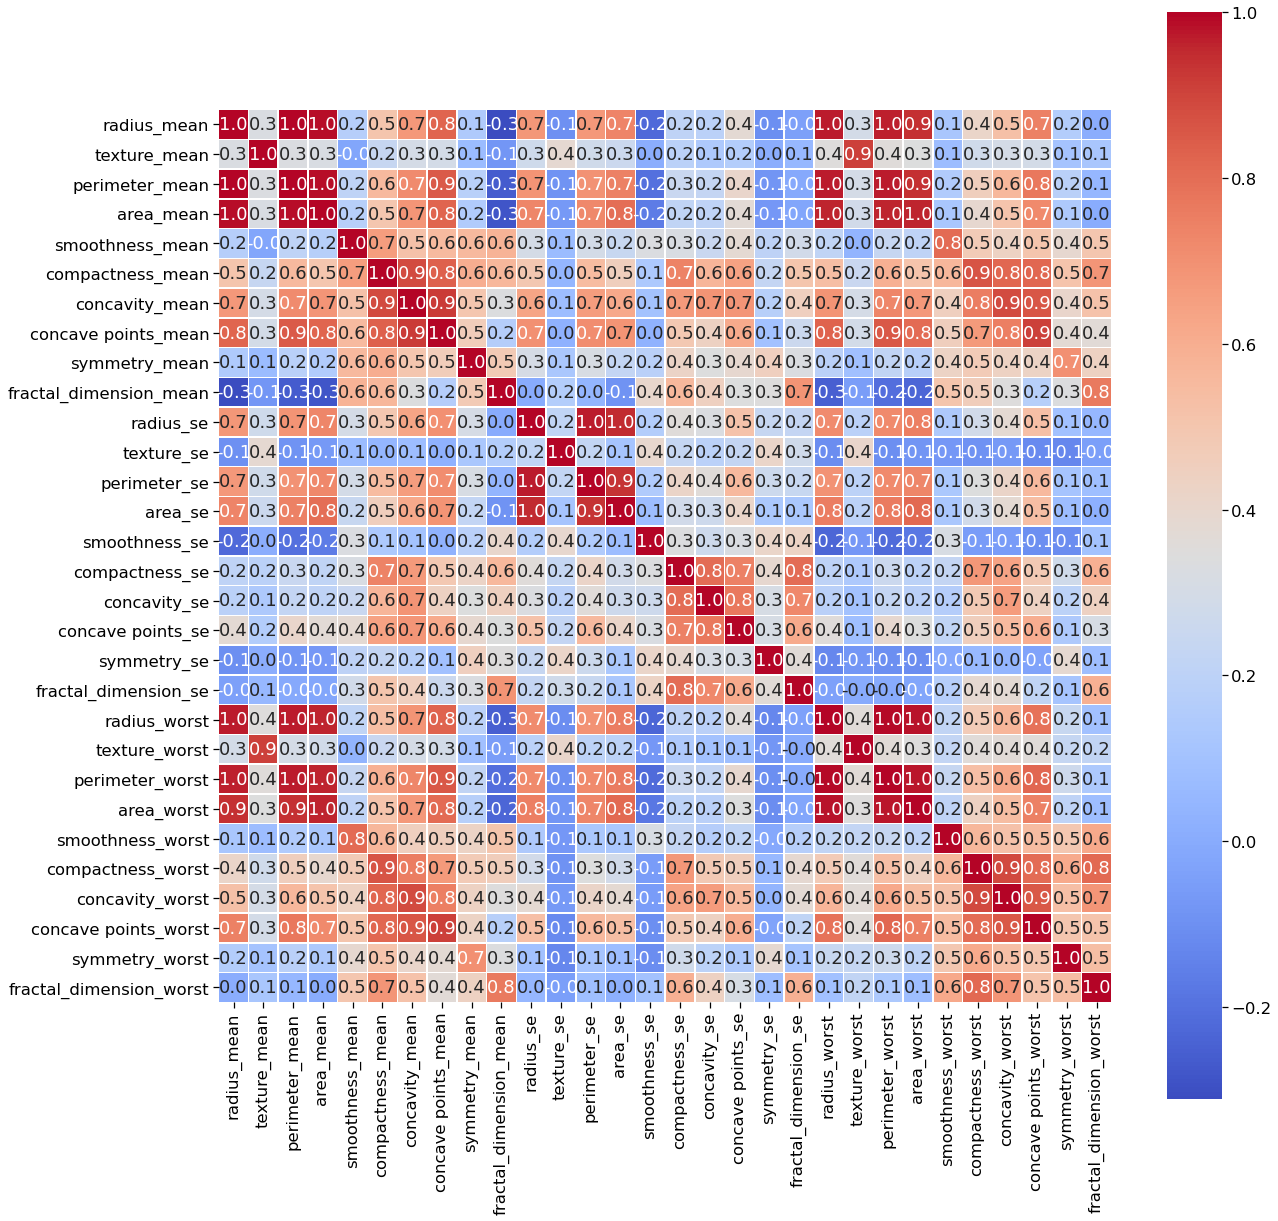

In [18]:
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax);

In [19]:
# Finding un-correlated variables via Pearson correlation coefficient between two array

In [20]:
def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for 'radius_mean', 'symmetry_mean'
r1 = pearson_r(df['radius_mean'], df['perimeter_mean'])
r2= pearson_r(df['radius_mean'], df['symmetry_mean'])

name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(df.iloc[:,1], df.iloc[:,j])
        if abs(r) >= 0.80 and df.columns[j]  not in name_c:
                    name_c.append(df.columns[j]) 
print()
print('* Lenght of columns assuming r >=0.80:', len(name_c)) 
print('name_c =',name_c)


* Lenght of columns assuming r >=0.80: 7
name_c = ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']


In [21]:
name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(df.iloc[:,1], df.iloc[:,j])
        if abs(r) <= 0.40 and df.columns[j]  not in name_c:
                    name_c.append(df.columns[j])
                            
print('* Lenght of columns assuming r <=0.40:', len(name_c)) 
print('name_c =',name_c) 

* Lenght of columns assuming r <=0.40: 15
name_c = ['texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [22]:
# Fitting correlated and uncorrelated data via linear regression:

Uncorrelated data are poentially more useful: discrimentory!


<Figure size 1080x1080 with 0 Axes>

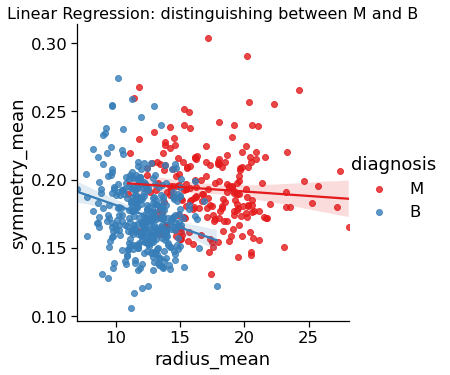

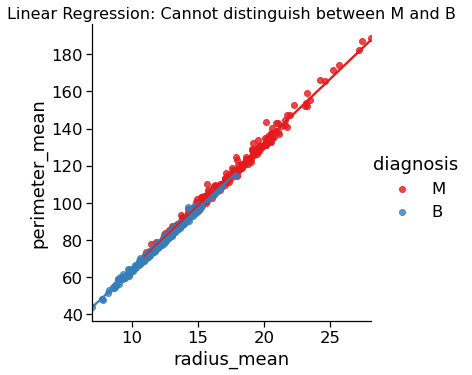

In [23]:
plt.figure(figsize=(15,15))
sns.lmplot(x='radius_mean', y= 'symmetry_mean', data = df, hue ='diagnosis', 
           palette='Set1')
plt.title('Linear Regression: distinguishing between M and B', size=16)


sns.lmplot(x='radius_mean', y= 'perimeter_mean', data = df, hue ='diagnosis', 
           palette='Set1')
plt.title('Linear Regression: Cannot distinguish between M and B', size=16);

print('Uncorrelated data are poentially more useful: discrimentory!')

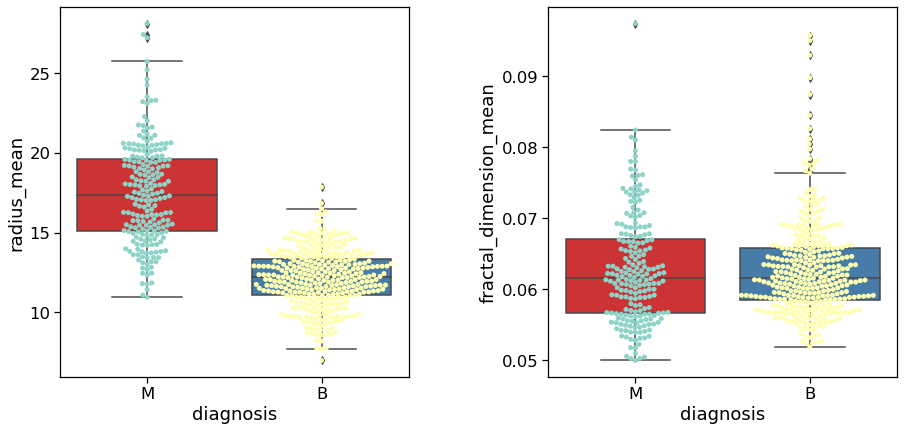

In [24]:
# Malignant and benign tumors have almost the same measures of fractal_dimension_mean.

# But radius_mean provides more information for classification (Left plot).

plt.figure(figsize=(15,15))
sns.set_context('notebook', font_scale=1.5)
plt.subplot(2, 2, 1)
sns.boxplot(y="radius_mean", x="diagnosis", data=df, palette="Set1") 
sns.swarmplot(x="diagnosis", y="radius_mean",data=df, palette="Set3", dodge=True)
plt.subplot(2, 2, 2)  
sns.boxplot(y="fractal_dimension_mean", x="diagnosis", data=df, palette="Set1")
sns.swarmplot(x="diagnosis", y="fractal_dimension_mean",data=df, palette="Set3",
              dodge=True)
plt.subplots_adjust(wspace=0.4); 

# Statistical inference

#### To further investigate the properties of features, the empirical cumulative distribution of features (ECDF), fractal_dimension_mean and radius_mean have been constructed.

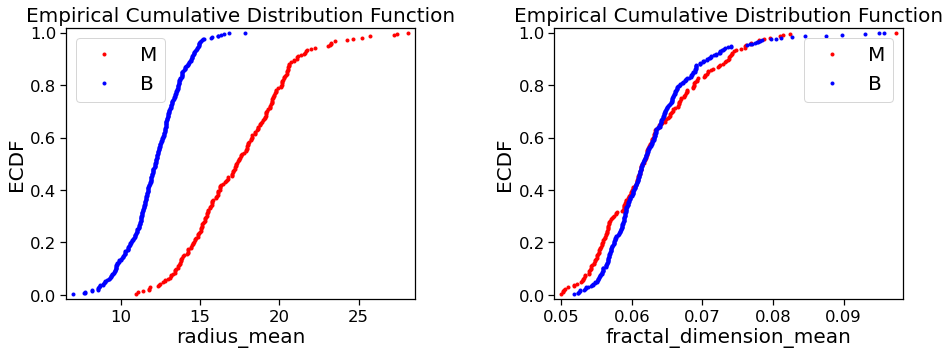

In [25]:
# CDF function
def ecdf(df):
    n=len(df)
    x=np.sort(df)
    y=np.arange(1, n+1)/n
    return x, y 

data2 = df['radius_mean']
Malignant = data2[df['diagnosis']=='M']
Benign = data2[df['diagnosis']=='B']

x1, y1 = ecdf(Malignant)
x2, y2 = ecdf(Benign)

data3 = df['fractal_dimension_mean']
Malignant_f = data3[df['diagnosis']=='M']
Benign_f = data3[df['diagnosis']=='B']

x3, y3 = ecdf(Malignant_f)
x4, y4 = ecdf(Benign_f)

plt.figure(figsize=(15,20))
plt.subplot(2, 2,  1)
plt.subplots_adjust(wspace=0.4, hspace=2)
plt.plot(x1, y1, marker='.',linestyle='none', color='red', label='M')
plt.plot(x2, y2, marker='.',linestyle='none', color ='blue', label='B')
plt.margins(0.02)
plt.xlabel('radius_mean', size=20)
plt.ylabel('ECDF', size=20)
plt.title('Empirical Cumulative Distribution Function', size=20)
plt.legend(prop={'size':20})
plt.subplot(2, 2,  2)
plt.subplots_adjust(wspace=0.4, hspace=2)
plt.plot(x3, y3, marker='.',linestyle='none', color='red', label='M')
plt.plot(x4, y4, marker='.',linestyle='none', color ='blue', label='B')
plt.margins(0.02)
plt.xlabel('fractal_dimension_mean', size=20)
plt.ylabel('ECDF', size=20)
plt.title('Empirical Cumulative Distribution Function', size=20)
plt.legend(prop={'size':20});

# Hypothesis testing

In [26]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates



def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff



In [27]:
diff_of_means(Malignant, Benign)

5.316306379155437

In [28]:
# Computing difference of mean overall acore
empirical_diff_means = diff_of_means(Malignant, Benign)

# Drawing 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Malignant, Benign,diff_of_means, size=10000)

# Computing p-value: p
p = np.sum(perm_replicates >= empirical_diff_means)/ len(perm_replicates) 

print('p-value =', p)

p-value = 0.0


In [29]:
# The p-value tells there is 0.0% chance to get the difference of means observed, if Malignant and Benign radius_mean were exactly the same.

# Machine Learning: Classification models

In [30]:
# Mapping the target: categorizing

In [31]:
# Mapping diagnosis column[object] to integer value:0, 1

data=df.copy()
data['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

# Spliting the data into train and test sets
#### The original data is splitting into train (70%) and test (30%).

In [32]:
# Split the data into train (0.7) and test (0.3)

## all data without dropping those with correlations
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, 
                                                    stratify=y)

print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# k-nearest neighbors (K-NN) Claqssification

#### A k-Nearest Neighbors (k-NN) classifier with 3 neighbors (k) was created, and fitted to the training data.

In [33]:
# Creating a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print('Accuracy KNN(1): ', knn.score(X_test, y_test))

Accuracy KNN(1):  0.9298245614035088


# Learning curves: over/underfitting

#### The learning curves for k-NN model were constructed, varying the number of neighbors.

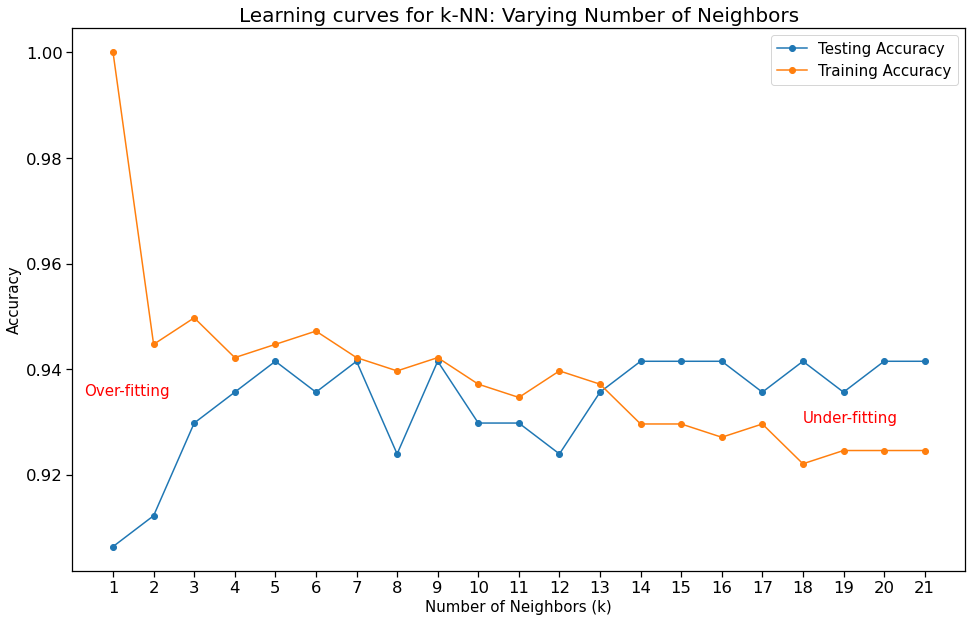

In [34]:
neighbors = np.arange(1, 22)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #Compute accuracy on the training and testing sets
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.figure(figsize=(16,10))
sns.set_context('notebook', font_scale=1.5)
plt.title('Learning curves for k-NN: Varying Number of Neighbors', size=20)
plt.plot(neighbors, test_accuracy, marker ='o', label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, marker ='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('Number of Neighbors (k)', size=15)
plt.ylabel('Accuracy', size=15)
plt.annotate('Over-fitting', xy=(0.5, 0.94), xytext=(0.3, 0.935), size=15, color='red')
plt.annotate('Under-fitting', xy=(0.5, 0.94), xytext=(18, 0.93), size=15, color='red')
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0));

#### It is seen from above over-fitting (low k) and under-fitting (high k).

#### The Optimized values of k  can be found via GridSearchCV in scikit-learn:

#### Normalization issue

From the plot below, and as it was shown in the EDA, it is possible to see that features are in different scales.

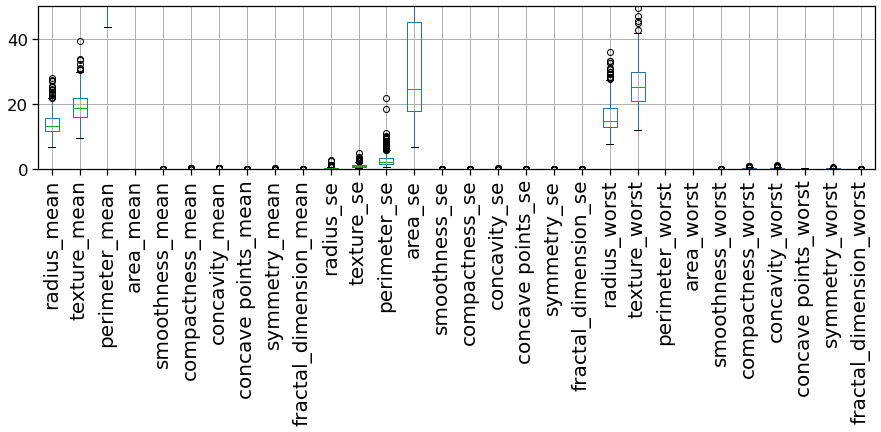

In [35]:
## data are distributed in a wide range (below), need to be normalizded.
plt.figure(figsize=(15,3))
ax= data.drop('diagnosis', axis=1).boxplot(data.columns.name, rot=90)
plt.xticks( size=20)
ax.set_ylim([0,50]);

## K-NN Learning Pipeline (including scaling)

#### A second k-NN model was created using a standardized data.

{'knn__n_neighbors': 7}

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.92      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

Best score is: 0.9698101265822784


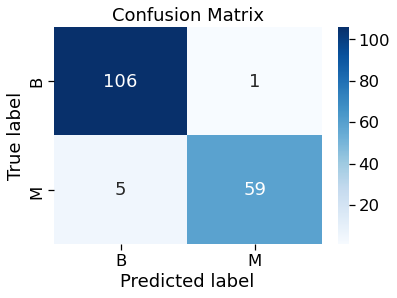

In [36]:
steps = [('scaler', StandardScaler()), 
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors' : np.arange(1, 50)}


k_nn = GridSearchCV(pipeline, param_grid=parameters)
k_nn.fit(X_train, y_train)
y_pred = k_nn.predict(X_test)

print(k_nn.best_params_)
print()
print(classification_report(y_test, y_pred))
print("Best score is: {}".format(k_nn.best_score_))

ConfMatrix = confusion_matrix(y_test,k_nn.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

In [37]:
cv_knn = cross_val_score(k_nn, X, y, cv=5, scoring='accuracy')

print('Average 5-Fold CV Score: ', cv_knn.mean(), ', Standard deviation: ', cv_knn.std())

Average 5-Fold CV Score:  0.9542617605961807 , Standard deviation:  0.018062709191666703


# Support Vector Classification

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}
Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Best score is: 0.9849244322928533


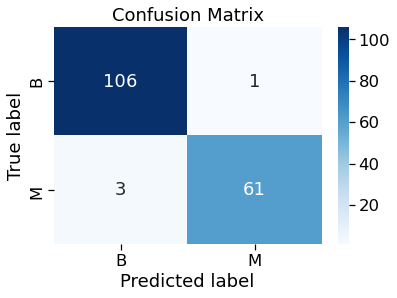

In [38]:
# To Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specifying the hyperparameter space: C is regularization strength while gamma controls the kernel coefficient. 
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Creating train & test sets

# Instantiate the GridSearchCV object: cv
cv =GridSearchCV(pipeline,parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Tuned Model Parameters: {}".format(cv.best_params_))
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Best score is: {}".format(cv.best_score_))

ConfMatrix = confusion_matrix(y_test,cv.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

### Visualization which SVC kernel is better:

/Users/suny/anaconda3/envs/genomics_3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


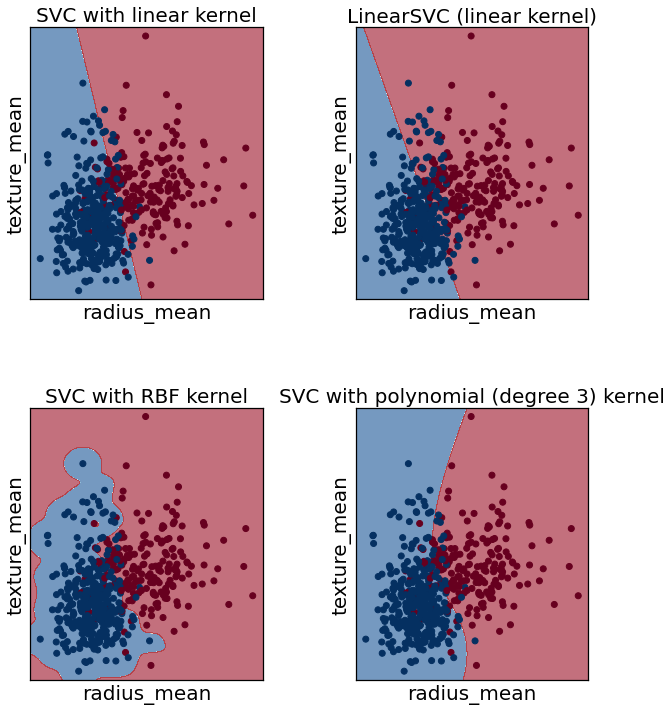

In [39]:
X = data.drop('diagnosis', axis=1).values[:,:2]
y = data['diagnosis'].values

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']
plt.figure(figsize=(10,12))
for j, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
# Plot the decision boundary by assigning a color to each point in the mesh 
    plt.subplot(2, 2, j + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap('RdBu_r'), alpha=0.6)

# Ploting  the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('RdBu_r'))
    plt.xlabel('radius_mean',size=20)
    plt.ylabel('texture_mean',size=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[j],size=20);

# Logistic Regression

/Users/suny/anaconda3/envs/genomics_3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/suny/anaconda3/envs/genomics_3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

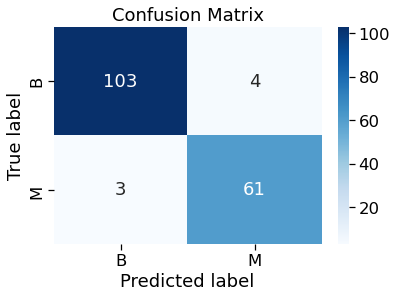

In [40]:
# Setup the hyperparameter grid, (not scaled data)
param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=1000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid , cv=5)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print()
print(classification_report(y_test, y_pred))
print("Best score is {}".format(logreg_cv.best_score_))

ConfMatrix = confusion_matrix(y_test,logreg_cv.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

# Random Forest Classifier

Accuracy: 0.9824561403508771

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       107
           1       0.97      0.98      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Average 5-Fold CV Score: 0.8857941313460642 , Standard deviation: 0.03128965943337306


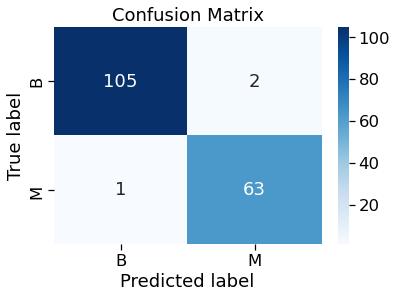

In [41]:
Ran = RandomForestClassifier(n_estimators=50)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)), 
      ", Standard deviation: {}".format(np.std(cv_scores)))

ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

### Extra Tree Classifier (reduced features)

Extra-Tree score: 0.9824561403508771
Shape of original data: (398, 30)

Shape of data with most important features: (398, 10)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       107
           1       0.97      0.98      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171




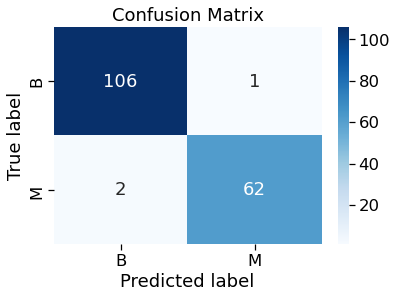

In [42]:
tree_2= ExtraTreesClassifier()
tree_2.fit(X_train, y_train)
print('Extra-Tree score:',tree_2.score(X_test, y_test))
print('Shape of original data:', X_train.shape)
print()
tree_2.feature_importances_
model_reduced = SelectFromModel(tree_2, prefit=True)
X_reduced = model_reduced.transform(X_train)
print('Shape of data with most important features:', X_reduced.shape)
print()
print(classification_report(y_test, y_pred))
print()

ConfMatrix = confusion_matrix(y_test,tree_2.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

# Nueral-Networks: KERAS-Tensorflow

In [43]:
### The data is not normalized. 

## method 1 
predictors= data.drop('diagnosis', axis=1).values  # .values to conver it to array
target = to_categorical(data.diagnosis.values)
n_cols = predictors.shape[1]

#np.random.seed(1337) # for reproducibility
seed = 2021
np.random.seed(seed)

model = Sequential()

# Add layers and nodes
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 
    

## Fit with 0.3 splitting with early_stopping_monitor with 30 epochs
early_stopping_monitor =EarlyStopping(patience=2) 
# Fit the model

history=model.fit(predictors, target, validation_split=0.3, epochs=100, batch_size=5,
                  callbacks = [early_stopping_monitor])

# 1 epoch = one forward pass and one backward pass of all the training examples
# batch size = number of samples that going to be propagated through the network.
# The higher the batch size, the more memory space. 

Epoch 1/100
80/80 [==============================] - 47s 18ms/step - loss: 34.0783 - accuracy: 0.5065 - val_loss: 2.2467 - val_accuracy: 0.6959
Epoch 2/100
80/80 [==============================] - 0s 6ms/step - loss: 0.8246 - accuracy: 0.8858 - val_loss: 0.7287 - val_accuracy: 0.8830
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 1.3013 - accuracy: 0.8750 - val_loss: 1.8896 - val_accuracy: 0.7135
Epoch 4/100
80/80 [==============================] - 0s 5ms/step - loss: 0.9728 - accuracy: 0.8716 - val_loss: 0.6799 - val_accuracy: 0.8713
Epoch 5/100
80/80 [==============================] - 1s 7ms/step - loss: 1.0239 - accuracy: 0.8555 - val_loss: 1.3892 - val_accuracy: 0.7544
Epoch 6/100
80/80 [==============================] - 0s 5ms/step - loss: 0.7326 - accuracy: 0.8543 - val_loss: 1.3299 - val_accuracy: 0.8070


# Feature Selection

#### Let's check the relative importance of features.

                         ExtraTree  Random-Forest
concave points_worst      0.096381       0.075258
perimeter_worst           0.094849       0.152175
area_worst                0.084070       0.073711
concave points_mean       0.079554       0.108791
radius_worst              0.079401       0.155574
radius_mean               0.067047       0.043120
area_mean                 0.066910       0.022108
concavity_mean            0.059504       0.044570
perimeter_mean            0.046825       0.073527
concavity_worst           0.034953       0.056909
area_se                   0.028804       0.021744
compactness_worst         0.028163       0.010278
compactness_mean          0.028147       0.007043
texture_mean              0.026114       0.020862
texture_worst             0.021710       0.021967
radius_se                 0.020106       0.006475
perimeter_se              0.018226       0.011779
symmetry_worst            0.017235       0.015683
smoothness_worst          0.016021       0.014980


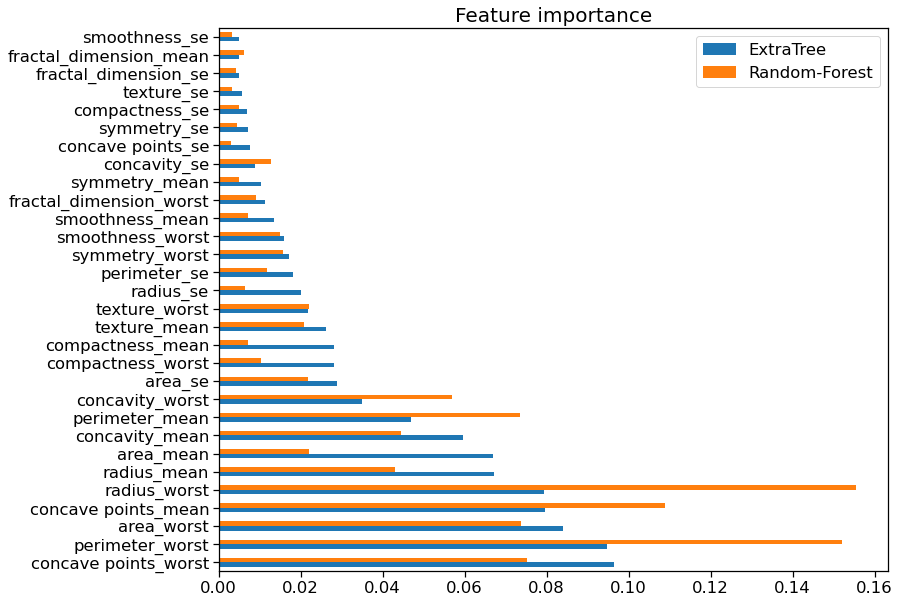

In [44]:
#RandomForest
impor_Forest=Ran.feature_importances_
indices_1 = np.argsort(impor_Forest)[::-1]

#ExtraTree
impor_Extra_tree=tree_2.feature_importances_
indices_2= np.argsort(impor_Extra_tree)[::-1]

featimp_1 = pd.Series(impor_Forest, index=data.columns[1:]).sort_values(ascending=False)
featimp_2 = pd.Series(impor_Extra_tree, index=data.columns[1:]).sort_values(ascending=False)

Table_impor= pd.DataFrame({'ExtraTree': featimp_2,'Random-Forest': featimp_1})
Table_impor=Table_impor.sort_values('ExtraTree', ascending=False)
print(Table_impor)
print()
print('The six most important features:')
print(featimp_1[0:6])

sns.set_context('notebook', font_scale=1.5)
Table_impor.plot(kind='barh', figsize=(12,10))
plt.title('Feature importance', size=20);